# 1.패키지 가져옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,186 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121926 files and dire

In [ ]:
# 런타임 다시 시작

# 데이터 분석과 관련된 필수 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 통계 분석 및 모델링을 위한 패키지 import

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score

import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

# Google Colab에서 드라이브 마운트
from google.colab import drive

# 기타 유용한 패키지 import
import os
import datetime
import time

# 나눔고딕 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

# 2.데이터 가져오기 및 확인 (df_)

In [ ]:
df_subway = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/이전 주제/교통 교통사고/서울시 행정동별 지하철 총 승차 승객수 정보.csv',
                        encoding='euc-kr')
df_bus = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/이전 주제/교통 교통사고/서울시 행정동별 버스 총 승차 승객수 정보.csv',
                     encoding='euc-kr')


In [ ]:
# 각 데이터프레임의 열 이름과 첫 번째 행의 값을 출력하는 함수
def print_column_names_and_first_row(dfs):
    for i, df in enumerate(dfs, 1):
        print(f"DataFrame {i}:")
        print("Columns:", df.columns.tolist())
        print("First Row:", df.iloc[0].tolist())
        print("Shape:",df.shape)
        print()

# dfs 지정
dfs=[df_subway,df_bus]

# 함수 호출
print_column_names_and_first_row(dfs)

DataFrame 1:
Columns: ['기준_날짜', '행정동_ID', '지하철_승객_수', '지하철_승객_수_00시', '지하철_승객_수_01시', '지하철_승객_수_02시', '지하철_승객_수_03시', '지하철_승객_수_04시', '지하철_승객_수_05시', '지하철_승객_수_06시', '지하철_승객_수_07시', '지하철_승객_수_08시', '지하철_승객_수_09시', '지하철_승객_수_10시', '지하철_승객_수_11시', '지하철_승객_수_12시', '지하철_승객_수_13시', '지하철_승객_수_14시', '지하철_승객_수_15시', '지하철_승객_수_16시', '지하철_승객_수_17시', '지하철_승객_수_18시', '지하철_승객_수_19시', '지하철_승객_수_20시', '지하철_승객_수_21시', '지하철_승객_수_22시', '지하철_승객_수_23시']
First Row: [20240612.0, 1124082.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Shape: (378682, 27)

DataFrame 2:
Columns: ['기준_날짜', '행정동_ID', '버스_승객_수', '버스_승객_수_00시', '버스_승객_수_01시', '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시', '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시', '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시', '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시', '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시'

## 행정동코드 가져오기 (df_localcode)

In [ ]:
# 행정동코드 불러오기
df_code = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0서울시 읍면동마스터 정보.csv',
                           encoding='euc-kr')

# 서울 데이터만 추출하기
df_code = df_code[(df_code['시도_명칭'] == '서울')]
df_code.shape

(426, 4)

In [ ]:
# '행정동_ID'를 10자리 문자열로 변환
df_code['행정동_ID'] = df_code['행정동_ID'].astype(str).str.ljust(10, '0')
df_code.head()

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
712,1125077000,상일2동,강동구,서울
713,1125076000,상일1동,강동구,서울
714,1125074000,길동,강동구,서울
715,1125073000,천호2동,강동구,서울
716,1125072000,암사1동,강동구,서울


In [ ]:
df_code.describe(include='all')

,행정동_ID,행정동_명칭,자치구_명칭,시도_명칭
count,426,426,426,426
unique,425,425,25,1
top,1125055000,신사동,송파구,서울
freq,2,2,27,426


In [ ]:
# df_localcode_subset에서 행정동_ID 중복 여부 확인
duplicate_ids = df_code[df_code.duplicated('행정동_ID', keep=False)]

if not duplicate_ids.empty:
    print("중복된 행정동_ID가 있습니다:")
    print(duplicate_ids)

In [ ]:
# 727번째 행 제거
df_code = df_code.drop(index=727)

# 4.버스 지하철 승객수 데이터 전처리

## 2022년 버스, 지하철 데이터만 추출 (df_bus, subway)

In [ ]:
# '기준_날짜'가 20220000부터 20230000 사이의 값만 남기기
df_bus = df_bus[(df_bus['기준_날짜'] >= 20220000) & (df_bus['기준_날짜'] < 20230000)]

# '기준_날짜'를 문자열로 변환한 후 날짜 형식으로 변환
df_bus['기준_날짜'] = pd.to_datetime(df_bus['기준_날짜'].astype(str), format='%Y%m%d')

# 필터링 결과 출력
# print(df_bus.head())
df_bus.shape

<ipython-input-8-1e4125f2d808>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus['기준_날짜'] = pd.to_datetime(df_bus['기준_날짜'].astype(str), format='%Y%m%d')


(154760, 27)

In [ ]:
# '기준_날짜'가 20220000부터 20230000 사이의 값만 남기기
df_subway = df_subway[(df_subway['기준_날짜'] >= 20220000) & (df_subway['기준_날짜'] < 20230000)]

# '기준_날짜'를 문자열로 변환한 후 날짜 형식으로 변환
df_subway['기준_날짜'] = pd.to_datetime(df_subway['기준_날짜'].astype(str), format='%Y%m%d')

# 필터링 결과 출력
# print(df_subway.head())
df_subway.shape

## 조인 (merged_bus)

In [ ]:
# 조인을 위해 '행정동_ID'를 10자리 문자열로 변환
df_bus['행정동_ID'] = df_bus['행정동_ID'].astype(str).str.ljust(10, '0')
df_bus.head()
df_bus.shape

<ipython-input-11-d6b0023ac52a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus['행정동_ID'] = df_bus['행정동_ID'].astype(str).str.ljust(10, '0')


(154760, 27)

In [ ]:
df_subway['행정동_ID'] = df_subway['행정동_ID'].astype(str).str.ljust(10, '0')
df_subway.head()
df_subway.shape

<ipython-input-12-4d9a54df19dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subway['행정동_ID'] = df_subway['행정동_ID'].astype(str).str.ljust(10, '0')


(154760, 27)

In [ ]:
# '행정동코드'와 '시군구명'만 선택
df_localcode_subset = df_code[['행정동_ID', '자치구_명칭']]

# '행정동_ID'와 '행정동코드'가 일치하는 경우 '시군구명'을 조인
merged_bus = pd.merge(df_bus, df_localcode_subset, on='행정동_ID', how='left')
merged_bus.head()
merged_bus.shape

(155125, 28)

In [ ]:
merged_bus.head()

,기준_날짜,행정동_ID,버스_승객_수,버스_승객_수_00시,버스_승객_수_01시,버스_승객_수_02시,버스_승객_수_03시,버스_승객_수_04시,버스_승객_수_05시,버스_승객_수_06시,...,버스_승객_수_15시,버스_승객_수_16시,버스_승객_수_17시,버스_승객_수_18시,버스_승객_수_19시,버스_승객_수_20시,버스_승객_수_21시,버스_승객_수_22시,버스_승객_수_23시,자치구_명칭
0,2022-12-31,1113069000,7054.0,59.0,29.0,10.0,6.0,62.0,100.0,112.0,...,552.0,547.0,490.0,372.0,318.0,262.0,252.0,219.0,162.0,서대문구
1,2022-12-31,1113052000,7581.0,21.0,21.0,4.0,0.0,53.0,106.0,150.0,...,626.0,640.0,583.0,471.0,340.0,286.0,202.0,206.0,109.0,서대문구
2,2022-12-31,1112068000,4280.0,35.0,11.0,4.0,2.0,31.0,75.0,109.0,...,310.0,296.0,288.0,278.0,153.0,162.0,128.0,127.0,76.0,은평구
3,2022-12-31,1112073000,8613.0,60.0,25.0,9.0,4.0,63.0,93.0,166.0,...,573.0,660.0,703.0,597.0,478.0,333.0,408.0,362.0,164.0,은평구
4,2022-12-31,1112056000,7274.0,76.0,37.0,14.0,10.0,44.0,56.0,110.0,...,427.0,540.0,538.0,523.0,427.0,372.0,415.0,426.0,242.0,은평구


In [ ]:
# '행정동_ID'와 '행정동코드'가 일치하는 경우 '시군구명'을 조인
merged_subway = pd.merge(df_subway, df_localcode_subset, on='행정동_ID', how='left')
merged_subway.head()
merged_subway.shape

(155125, 28)

## 자치구별 통합 승객 수

In [ ]:
merged_bus.columns

Index(['기준_날짜', '행정동_ID', '버스_승객_수', '버스_승객_수_00시', '버스_승객_수_01시',
       '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시',
       '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시',
       '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시',
       '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시',
       '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시',
       '버스_승객_수_22시', '버스_승객_수_23시', '자치구_명칭'],
      dtype='object')

In [ ]:
drop_bus = merged_bus.drop(columns=['기준_날짜', '행정동_ID', '버스_승객_수_00시', '버스_승객_수_01시',
       '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시',
       '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시',
       '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시',
       '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시',
       '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시',
       '버스_승객_수_22시', '버스_승객_수_23시'])

In [ ]:
merged_subway.columns

Index(['기준_날짜', '행정동_ID', '지하철_승객_수', '지하철_승객_수_00시', '지하철_승객_수_01시',
       '지하철_승객_수_02시', '지하철_승객_수_03시', '지하철_승객_수_04시', '지하철_승객_수_05시',
       '지하철_승객_수_06시', '지하철_승객_수_07시', '지하철_승객_수_08시', '지하철_승객_수_09시',
       '지하철_승객_수_10시', '지하철_승객_수_11시', '지하철_승객_수_12시', '지하철_승객_수_13시',
       '지하철_승객_수_14시', '지하철_승객_수_15시', '지하철_승객_수_16시', '지하철_승객_수_17시',
       '지하철_승객_수_18시', '지하철_승객_수_19시', '지하철_승객_수_20시', '지하철_승객_수_21시',
       '지하철_승객_수_22시', '지하철_승객_수_23시', '자치구_명칭'],
      dtype='object')

In [ ]:
drop_subway = merged_subway.drop(columns=['기준_날짜', '행정동_ID', '지하철_승객_수_00시', '지하철_승객_수_01시',
       '지하철_승객_수_02시', '지하철_승객_수_03시', '지하철_승객_수_04시', '지하철_승객_수_05시',
       '지하철_승객_수_06시', '지하철_승객_수_07시', '지하철_승객_수_08시', '지하철_승객_수_09시',
       '지하철_승객_수_10시', '지하철_승객_수_11시', '지하철_승객_수_12시', '지하철_승객_수_13시',
       '지하철_승객_수_14시', '지하철_승객_수_15시', '지하철_승객_수_16시', '지하철_승객_수_17시',
       '지하철_승객_수_18시', '지하철_승객_수_19시', '지하철_승객_수_20시', '지하철_승객_수_21시',
       '지하철_승객_수_22시', '지하철_승객_수_23시'])

In [ ]:
group_bus = merged_bus.groupby('자치구_명칭')['버스_승객_수'].sum()
group_subway = merged_subway.groupby('자치구_명칭')['지하철_승객_수'].sum()

In [ ]:
group_bus

자치구_명칭
강남구     102254991.0
강동구      28896885.0
강북구      58019122.0
강서구      55867325.0
관악구      90091326.0
광진구      33239859.0
구로구      56946369.0
금천구      45064241.0
노원구      50555099.0
도봉구      38905312.0
동대문구     63277797.0
동작구      62544046.0
마포구      64501321.0
서대문구     68045050.0
서초구      78177315.0
성동구      34151994.0
성북구      76316961.0
송파구      67418612.0
양천구      49935376.0
영등포구     69249142.0
용산구      50522621.0
은평구      61785742.0
종로구      67437230.0
중구       45734613.0
중랑구      46030861.0
Name: 버스_승객_수, dtype: float64

In [ ]:
group_bus.set_index('자치구_명칭',inplace = True)
group_subway.set_index('자치구_명칭',inplace = True)

### 정규성 확인

버스승객은 정규

지하철승객은 좌측 편향

In [ ]:
# 'df'가 시리즈인지 데이터프레임인지 확인하고 단일 열 추출
if isinstance(group_subway, pd.DataFrame):
    column = group_subway.columns[0]
    data = group_subway[column]
else:
    data = group_subway

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


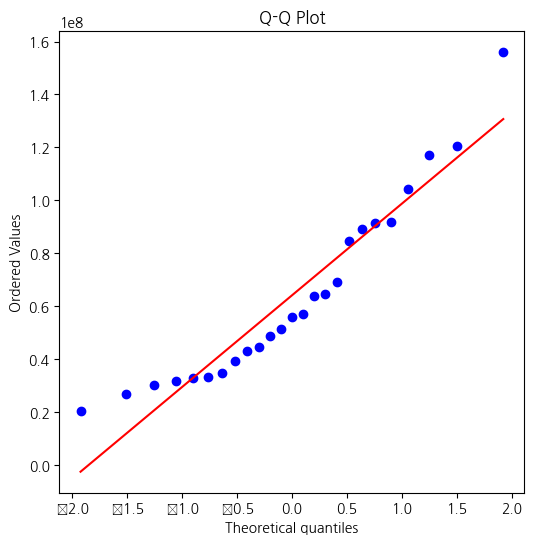

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


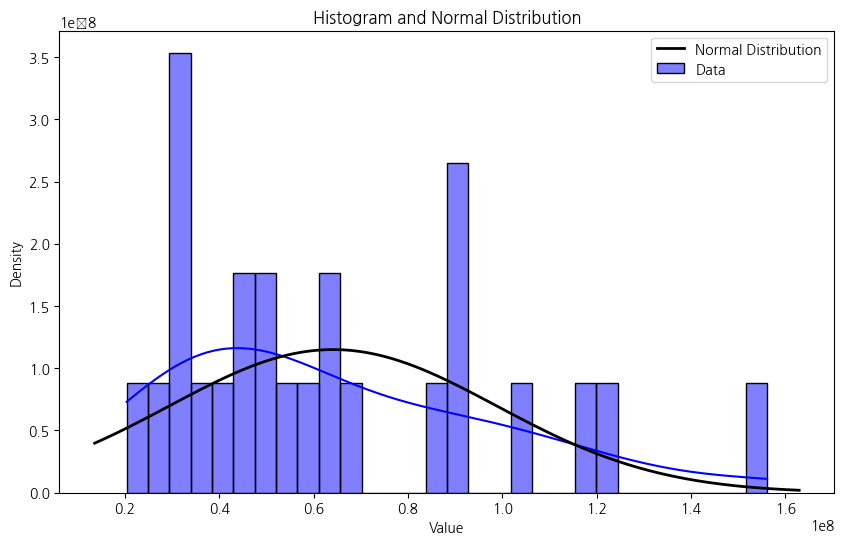

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# 히스토그램과 정규분포 곡선
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat="density", bins=30, color='blue', label='Data')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, data.mean(), data.std())
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.title('Histogram and Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

### 상관분석이나 PCA후 결합

In [ ]:
# 분석 전 조인
total = pd.merge(group_bus, group_subway, on='자치구_명칭', how='left')
total.head()

,버스_승객_수,지하철_승객_수
자치구_명칭,,
강남구,102254991.0,156156645.0
강동구,28896885.0,44532905.0
강북구,58019122.0,30349973.0
강서구,55867325.0,69240377.0
관악구,90091326.0,84730237.0


           버스_승객_수  지하철_승객_수
버스_승객_수   1.000000  0.548467
지하철_승객_수  0.548467  1.000000


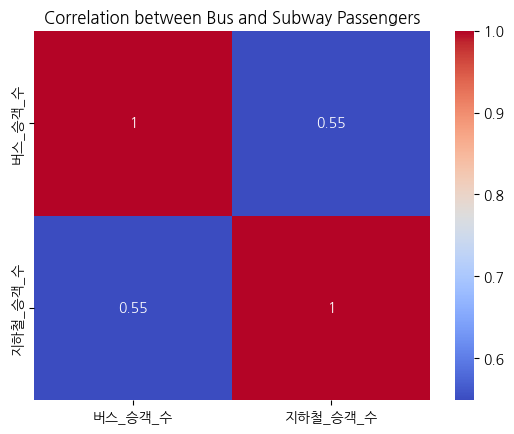

In [ ]:
# 상관관계 분석
correlation = total[['버스_승객_수', '지하철_승객_수']].corr()
print(correlation)

# 상관관계 시각화
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Bus and Subway Passengers')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max 스케일링
scaler = MinMaxScaler()
total[['버스승객수_scaled', '지하철승객수_scaled']] = scaler.fit_transform(total[['버스_승객_수', '지하철_승객_수']])

# 결과 확인
print(total)

            버스_승객_수     지하철_승객_수  버스승객수_scaled  지하철승객수_scaled
자치구_명칭                                                       
강남구     102254991.0  156156645.0      1.000000       1.000000
강동구      28896885.0   44532905.0      0.000000       0.178010
강북구      58019122.0   30349973.0      0.396987       0.073567
강서구      55867325.0   69240377.0      0.367655       0.359954
관악구      90091326.0   84730237.0      0.834188       0.474020
광진구      33239859.0   64689981.0      0.059202       0.326445
구로구      56946369.0   55761508.0      0.382364       0.260696
금천구      45064241.0   20359752.0      0.220389       0.000000
노원구      50555099.0   57060229.0      0.295240       0.270260
도봉구      38905312.0   26899465.0      0.136432       0.048158
동대문구     63277797.0   34763333.0      0.468672       0.106067
동작구      62544046.0   51341245.0      0.458670       0.228146
마포구      64501321.0   91715402.0      0.485351       0.525459
서대문구     68045050.0   32743155.0      0.533658       0.091191
서초구     

            버스_승객_수     지하철_승객_수  버스승객수_scaled  지하철승객수_scaled      총승객수
자치구_명칭                                                                 
강남구     102254991.0  156156645.0      1.000000       1.000000  1.000000
강동구      28896885.0   44532905.0      0.000000       0.178010  0.089005
강북구      58019122.0   30349973.0      0.396987       0.073567  0.235277
강서구      55867325.0   69240377.0      0.367655       0.359954  0.363804
관악구      90091326.0   84730237.0      0.834188       0.474020  0.654104
광진구      33239859.0   64689981.0      0.059202       0.326445  0.192824
구로구      56946369.0   55761508.0      0.382364       0.260696  0.321530
금천구      45064241.0   20359752.0      0.220389       0.000000  0.110195
노원구      50555099.0   57060229.0      0.295240       0.270260  0.282750
도봉구      38905312.0   26899465.0      0.136432       0.048158  0.092295
동대문구     63277797.0   34763333.0      0.468672       0.106067  0.287370
동작구      62544046.0   51341245.0      0.458670       0.228146  0

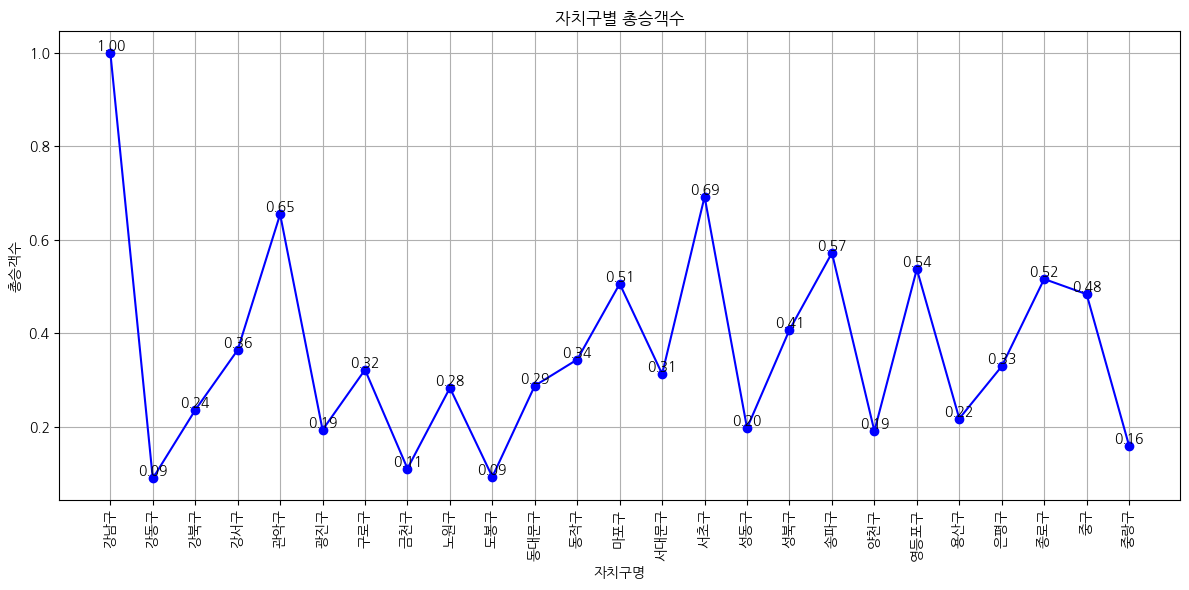

In [ ]:
# 가중 평균을 사용하여 병합 (가중치는 동일하게 설정)
total['총승객수'] = (total['버스승객수_scaled'] + total['지하철승객수_scaled']) / 2

# 결과 확인
print(total)

# 병합된 총승객수를 시각화
plt.figure(figsize=(12, 6))
plt.plot(total.index, total['총승객수'], marker='o', linestyle='-', color='b')
for i, value in enumerate(total['총승객수']):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom')
plt.title('자치구별 총승객수')
plt.xlabel('자치구명')
plt.ylabel('총승객수')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 비교 결과 평균을 사용
# 단순 합산을 사용하여 병합
total['총승객수_합산'] = total['버스승객수_scaled'] + total['지하철승객수_scaled']

# 결과 확인
print(total)

# 병합된 두 열을 시각화
plt.figure(figsize=(12, 6))
plt.plot(total.index, total['총승객수'], marker='o', linestyle='-', color='b', label='가중평균')
plt.plot(total.index, total['총승객수_합산'], marker='o', linestyle='--', color='r', label='합산')

for i, value in enumerate(total['총승객수']):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom', color='blue')
for i, value in enumerate(total['총승객수_합산']):
    plt.text(i, value, f"{value:.2f}", ha='center', va='top', color='red')

plt.title('자치구별 총승객수 비교 (가중평균 vs 합산)')
plt.xlabel('자치구명')
plt.ylabel('총승객수')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
total.columns

Index(['버스_승객_수', '지하철_승객_수', '버스승객수_scaled', '지하철승객수_scaled', '총승객수',
       '총승객수_합산'],
      dtype='object')

In [ ]:
total=total.drop(columns=['총승객수_합산'])

In [ ]:
total.to_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/구별_유동인구.csv')

## 날짜별, 월별, 시간대별, 구별 분류 (subway_proc)

In [ ]:
merged_subway.columns

Index(['기준_날짜', '행정동_ID', '지하철_승객_수', '지하철_승객_수_00시', '지하철_승객_수_01시',
       '지하철_승객_수_02시', '지하철_승객_수_03시', '지하철_승객_수_04시', '지하철_승객_수_05시',
       '지하철_승객_수_06시', '지하철_승객_수_07시', '지하철_승객_수_08시', '지하철_승객_수_09시',
       '지하철_승객_수_10시', '지하철_승객_수_11시', '지하철_승객_수_12시', '지하철_승객_수_13시',
       '지하철_승객_수_14시', '지하철_승객_수_15시', '지하철_승객_수_16시', '지하철_승객_수_17시',
       '지하철_승객_수_18시', '지하철_승객_수_19시', '지하철_승객_수_20시', '지하철_승객_수_21시',
       '지하철_승객_수_22시', '지하철_승객_수_23시', '자치구_명칭'],
      dtype='object')

In [ ]:
# 00시부터 23시까지의 열 이름 생성
columns = [f'지하철_승객_수_{str(i).zfill(2)}시' for i in range(24)]

In [ ]:
# 각 그룹의 합산 열 추가
for i in range(0, 24, 4):
    group_columns = columns[i:i+4]
    group_name = f'지하철_승객_수_{str(i).zfill(2)}시-{str(i+3).zfill(2)}시'
    merged_subway[group_name] = merged_subway[group_columns].sum(axis=1)

# 불필요한 개별 열 제거 (선택 사항)
merged_subway = merged_subway.drop(columns=columns)

# 결과 확인
print(merged_subway.head())

       기준_날짜      행정동_ID  지하철_승객_수 자치구_명칭  지하철_승객_수_00시-03시  지하철_승객_수_04시-07시  \
0 2022-12-31  1113069000    1952.0   서대문구               3.0             143.0   
1 2022-12-31  1113052000    5355.0   서대문구              29.0             356.0   
2 2022-12-31  1112068000     385.0    은평구               0.0              27.0   
3 2022-12-31  1112073000       NaN    은평구               0.0               0.0   
4 2022-12-31  1112056000    5278.0    은평구              13.0             463.0   

   지하철_승객_수_08시-11시  지하철_승객_수_12시-15시  지하철_승객_수_16시-19시  지하철_승객_수_20시-23시  
0             555.0             617.0             442.0             192.0  
1            1322.0            1854.0            1320.0             474.0  
2             112.0             125.0              76.0              45.0  
3               0.0               0.0               0.0               0.0  
4            1568.0            1635.0            1187.0             412.0  


In [ ]:
import pandas as pd

# 기준 날짜에서 월과 요일을 추출하여 새로운 열 추가
merged_subway['월'] = pd.to_datetime(merged_subway['기준_날짜']).dt.month
merged_subway['요일'] = pd.to_datetime(merged_subway['기준_날짜']).dt.day_name()

# 결과 확인
print(merged_subway.head())


       기준_날짜      행정동_ID  지하철_승객_수 자치구_명칭  지하철_승객_수_00시-03시  지하철_승객_수_04시-07시  \
0 2022-12-31  1113069000    1952.0   서대문구               3.0             143.0   
1 2022-12-31  1113052000    5355.0   서대문구              29.0             356.0   
2 2022-12-31  1112068000     385.0    은평구               0.0              27.0   
3 2022-12-31  1112073000       NaN    은평구               0.0               0.0   
4 2022-12-31  1112056000    5278.0    은평구              13.0             463.0   

   지하철_승객_수_08시-11시  지하철_승객_수_12시-15시  지하철_승객_수_16시-19시  지하철_승객_수_20시-23시   월  \
0             555.0             617.0             442.0             192.0  12   
1            1322.0            1854.0            1320.0             474.0  12   
2             112.0             125.0              76.0              45.0  12   
3               0.0               0.0               0.0               0.0  12   
4            1568.0            1635.0            1187.0             412.0  12   

         요일  
0  Saturday 

In [ ]:
merged_subway.columns

Index(['기준_날짜', '행정동_ID', '지하철_승객_수', '자치구_명칭', '지하철_승객_수_00시-03시',
       '지하철_승객_수_04시-07시', '지하철_승객_수_08시-11시', '지하철_승객_수_12시-15시',
       '지하철_승객_수_16시-19시', '지하철_승객_수_20시-23시', '월', '요일'],
      dtype='object')

In [ ]:
#각 월과 요일별로 승객 수를 합산하는 새로운 열 생성
for month in range(1, 13):
    merged_subway[f'{month}월'] = merged_subway.apply(lambda row: row['지하철_승객_수'] if row['월'] == month else 0, axis=1)

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
korean_days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

for eng_day, kor_day in zip(days_of_week, korean_days):
    merged_subway[kor_day] = merged_subway.apply(lambda row: row['지하철_승객_수'] if row['요일'] == eng_day else 0, axis=1)

# 자치구명칭을 기준으로 그룹화하여 시간대별, 월별, 요일별 승객 수 합산
grouped_subway = merged_subway.groupby('자치구_명칭').agg({
    '지하철_승객_수_00시-03시': 'sum',
    '지하철_승객_수_04시-07시': 'sum',
    '지하철_승객_수_08시-11시': 'sum',
    '지하철_승객_수_12시-15시': 'sum',
    '지하철_승객_수_16시-19시': 'sum',
    '지하철_승객_수_20시-23시': 'sum',
    '1월': 'sum',
    '2월': 'sum',
    '3월': 'sum',
    '4월': 'sum',
    '5월': 'sum',
    '6월': 'sum',
    '7월': 'sum',
    '8월': 'sum',
    '9월': 'sum',
    '10월': 'sum',
    '11월': 'sum',
    '12월': 'sum',
    '월요일': 'sum',
    '화요일': 'sum',
    '수요일': 'sum',
    '목요일': 'sum',
    '금요일': 'sum',
    '토요일': 'sum',
    '일요일': 'sum'
}).reset_index()

# 결과 확인
print(grouped_subway.head())


  자치구_명칭  지하철_승객_수_00시-03시  지하철_승객_수_04시-07시  지하철_승객_수_08시-11시  \
0    강남구          237397.0         6427164.0        18752300.0   
1    강동구           36669.0         7551265.0        13475073.0   
2    강북구           16253.0         5948426.0         9641268.0   
3    강서구           49779.0        11410630.0        19549838.0   
4    관악구          125636.0        13043593.0        28588735.0   

   지하철_승객_수_12시-15시  지하철_승객_수_16시-19시  지하철_승객_수_20시-23시          1월  \
0        29329217.0        72071798.0        29338769.0  11962723.0   
1         9044874.0        10623104.0         3801920.0   3485713.0   
2         6283838.0         6175350.0         2284838.0   2334869.0   
3        13687755.0        17990173.0         6552202.0   5364822.0   
4        16162541.0        17547046.0         9262686.0   6412197.0   

           2월          3월  ...         10월         11월         12월  \
0  10049991.0  10784807.0  ...  14330295.0  14435905.0  14314092.0   
1   2963301.0   3271783.0  ...   406

In [ ]:
# 총 승객 수 계산 및 새로운 열 추가
grouped_subway['총 승객수'] = grouped_subway[['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']].sum(axis=1)

# 결과 확인
print(grouped_subway.head())


  자치구_명칭  지하철_승객_수_00시-03시  지하철_승객_수_04시-07시  지하철_승객_수_08시-11시  \
0    강남구          237397.0         6427164.0        18752300.0   
1    강동구           36669.0         7551265.0        13475073.0   
2    강북구           16253.0         5948426.0         9641268.0   
3    강서구           49779.0        11410630.0        19549838.0   
4    관악구          125636.0        13043593.0        28588735.0   

   지하철_승객_수_12시-15시  지하철_승객_수_16시-19시  지하철_승객_수_20시-23시          1월  \
0        29329217.0        72071798.0        29338769.0  11962723.0   
1         9044874.0        10623104.0         3801920.0   3485713.0   
2         6283838.0         6175350.0         2284838.0   2334869.0   
3        13687755.0        17990173.0         6552202.0   5364822.0   
4        16162541.0        17547046.0         9262686.0   6412197.0   

           2월          3월  ...         11월         12월         월요일  \
0  10049991.0  10784807.0  ...  14435905.0  14314092.0  23620348.0   
1   2963301.0   3271783.0  ...   397

In [ ]:
grouped_subway.columns

Index(['자치구_명칭', '지하철_승객_수_00시-03시', '지하철_승객_수_04시-07시', '지하철_승객_수_08시-11시',
       '지하철_승객_수_12시-15시', '지하철_승객_수_16시-19시', '지하철_승객_수_20시-23시', '1월', '2월',
       '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월', '월요일',
       '화요일', '수요일', '목요일', '금요일', '토요일', '일요일', '총 승객수'],
      dtype='object')

In [ ]:
# 컬럼명을 짧은 단어로 변경
grouped_subway.rename(columns={
    '자치구_명칭': '자치구',
    '지하철_승객_수_00시-03시': 'Late Night',
    '지하철_승객_수_04시-07시': 'Early Morning',
    '지하철_승객_수_08시-11시': 'Morning',
    '지하철_승객_수_12시-15시': 'Afternoon',
    '지하철_승객_수_16시-19시': 'Evening',
    '지하철_승객_수_20시-23시': 'Night',
    '월요일': 'Monday',
    '화요일': 'Tuesday',
    '수요일': 'Wednesday',
    '목요일': 'Thursday',
    '금요일': 'Friday',
    '토요일': 'Saturday',
    '일요일': 'Sunday',
    '총 승객수': '총지하철승객'
}, inplace=True)

# 결과 확인
print(grouped_subway.columns)

Index(['자치구', 'Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening',
       'Night', '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월',
       '11월', '12월', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday', 'Sunday', '총지하철승객'],
      dtype='object')


## bus_proc

In [ ]:
merged_bus.columns

Index(['기준_날짜', '행정동_ID', '버스_승객_수', '버스_승객_수_00시', '버스_승객_수_01시',
       '버스_승객_수_02시', '버스_승객_수_03시', '버스_승객_수_04시', '버스_승객_수_05시',
       '버스_승객_수_06시', '버스_승객_수_07시', '버스_승객_수_08시', '버스_승객_수_09시',
       '버스_승객_수_10시', '버스_승객_수_11시', '버스_승객_수_12시', '버스_승객_수_13시',
       '버스_승객_수_14시', '버스_승객_수_15시', '버스_승객_수_16시', '버스_승객_수_17시',
       '버스_승객_수_18시', '버스_승객_수_19시', '버스_승객_수_20시', '버스_승객_수_21시',
       '버스_승객_수_22시', '버스_승객_수_23시', '자치구_명칭'],
      dtype='object')

In [ ]:
# 00시부터 23시까지의 열 이름 생성
columns = [f'버스_승객_수_{str(i).zfill(2)}시' for i in range(24)]

# 각 그룹의 합산 열 추가
for i in range(0, 24, 4):
    group_columns = columns[i:i+4]
    group_name = f'버스_승객_수_{str(i).zfill(2)}시-{str(i+3).zfill(2)}시'
    merged_bus[group_name] = merged_bus[group_columns].sum(axis=1)

# 불필요한 개별 열 제거 (선택 사항)
merged_bus = merged_bus.drop(columns=columns)

# 결과 확인
print(merged_bus.head())

       기준_날짜      행정동_ID  버스_승객_수 자치구_명칭  버스_승객_수_00시-03시  버스_승객_수_04시-07시  \
0 2022-12-31  1113069000   7054.0   서대문구            104.0            459.0   
1 2022-12-31  1113052000   7581.0   서대문구             46.0            495.0   
2 2022-12-31  1112068000   4280.0    은평구             52.0            340.0   
3 2022-12-31  1112073000   8613.0    은평구             98.0            525.0   
4 2022-12-31  1112056000   7274.0    은평구            137.0            384.0   

   버스_승객_수_08시-11시  버스_승객_수_12시-15시  버스_승객_수_16시-19시  버스_승객_수_20시-23시  
0           1624.0           2245.0           1727.0            895.0  
1           1750.0           2453.0           2034.0            803.0  
2           1131.0           1249.0           1015.0            493.0  
3           1797.0           2488.0           2438.0           1267.0  
4           1397.0           1873.0           2028.0           1455.0  


In [ ]:
# 기준 날짜에서 월과 요일을 추출하여 새로운 열 추가
merged_bus['월'] = pd.to_datetime(merged_bus['기준_날짜']).dt.month
merged_bus['요일'] = pd.to_datetime(merged_bus['기준_날짜']).dt.day_name()

# 결과 확인
print(merged_bus.head())

       기준_날짜      행정동_ID  버스_승객_수 자치구_명칭  버스_승객_수_00시-03시  버스_승객_수_04시-07시  \
0 2022-12-31  1113069000   7054.0   서대문구            104.0            459.0   
1 2022-12-31  1113052000   7581.0   서대문구             46.0            495.0   
2 2022-12-31  1112068000   4280.0    은평구             52.0            340.0   
3 2022-12-31  1112073000   8613.0    은평구             98.0            525.0   
4 2022-12-31  1112056000   7274.0    은평구            137.0            384.0   

   버스_승객_수_08시-11시  버스_승객_수_12시-15시  버스_승객_수_16시-19시  버스_승객_수_20시-23시   월  \
0           1624.0           2245.0           1727.0            895.0  12   
1           1750.0           2453.0           2034.0            803.0  12   
2           1131.0           1249.0           1015.0            493.0  12   
3           1797.0           2488.0           2438.0           1267.0  12   
4           1397.0           1873.0           2028.0           1455.0  12   

         요일  
0  Saturday  
1  Saturday  
2  Saturday  
3  Saturday 

In [ ]:
#각 월과 요일별로 승객 수를 합산하는 새로운 열 생성
for month in range(1, 13):
    merged_bus[f'{month}월'] = merged_bus.apply(lambda row: row['버스_승객_수'] if row['월'] == month else 0, axis=1)

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
korean_days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']

for eng_day, kor_day in zip(days_of_week, korean_days):
    merged_bus[kor_day] = merged_bus.apply(lambda row: row['버스_승객_수'] if row['요일'] == eng_day else 0, axis=1)

# 자치구명칭을 기준으로 그룹화하여 시간대별, 월별, 요일별 승객 수 합산
grouped_bus = merged_bus.groupby('자치구_명칭').agg({
    '버스_승객_수_00시-03시': 'sum',
    '버스_승객_수_04시-07시': 'sum',
    '버스_승객_수_08시-11시': 'sum',
    '버스_승객_수_12시-15시': 'sum',
    '버스_승객_수_16시-19시': 'sum',
    '버스_승객_수_20시-23시': 'sum',
    '1월': 'sum',
    '2월': 'sum',
    '3월': 'sum',
    '4월': 'sum',
    '5월': 'sum',
    '6월': 'sum',
    '7월': 'sum',
    '8월': 'sum',
    '9월': 'sum',
    '10월': 'sum',
    '11월': 'sum',
    '12월': 'sum',
    '월요일': 'sum',
    '화요일': 'sum',
    '수요일': 'sum',
    '목요일': 'sum',
    '금요일': 'sum',
    '토요일': 'sum',
    '일요일': 'sum'
}).reset_index()

# 결과 확인
print(grouped_bus.head())


  자치구_명칭  버스_승객_수_00시-03시  버스_승객_수_04시-07시  버스_승객_수_08시-11시  버스_승객_수_12시-15시  \
0    강남구        1198054.0        8545205.0       22822464.0       21227205.0   
1    강동구         227345.0        3372227.0        6307342.0        5958895.0   
2    강북구         394132.0        7387652.0       13518527.0       12970243.0   
3    강서구         373945.0        6883149.0       13391213.0       12170735.0   
4    관악구         598769.0       10715775.0       21226602.0       18347491.0   

   버스_승객_수_16시-19시  버스_승객_수_20시-23시         1월         2월         3월  ...  \
0       31243378.0       17218685.0  7796272.0  6687447.0  7502696.0  ...   
1        7736649.0        4056291.0  2090454.0  1825110.0  2053614.0  ...   
2       15688518.0        8060050.0  4466101.0  3894539.0  4382599.0  ...   
3       15378167.0        7670116.0  4287110.0  3727510.0  4165953.0  ...   
4       24560420.0       14642269.0  6949650.0  6136952.0  7043064.0  ...   

         10월        11월        12월         월요일         화

In [ ]:
# 총 승객 수 계산 및 새로운 열 추가
grouped_bus['총 승객수'] = grouped_bus[['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']].sum(axis=1)

# 결과 확인
print(grouped_bus.head())


  자치구_명칭  버스_승객_수_00시-03시  버스_승객_수_04시-07시  버스_승객_수_08시-11시  버스_승객_수_12시-15시  \
0    강남구        1198054.0        8545205.0       22822464.0       21227205.0   
1    강동구         227345.0        3372227.0        6307342.0        5958895.0   
2    강북구         394132.0        7387652.0       13518527.0       12970243.0   
3    강서구         373945.0        6883149.0       13391213.0       12170735.0   
4    관악구         598769.0       10715775.0       21226602.0       18347491.0   

   버스_승객_수_16시-19시  버스_승객_수_20시-23시         1월         2월         3월  ...  \
0       31243378.0       17218685.0  7796272.0  6687447.0  7502696.0  ...   
1        7736649.0        4056291.0  2090454.0  1825110.0  2053614.0  ...   
2       15688518.0        8060050.0  4466101.0  3894539.0  4382599.0  ...   
3       15378167.0        7670116.0  4287110.0  3727510.0  4165953.0  ...   
4       24560420.0       14642269.0  6949650.0  6136952.0  7043064.0  ...   

         11월        12월         월요일         화요일         

In [ ]:
# 컬럼명을 짧은 단어로 변경
grouped_bus.rename(columns={
    '자치구_명칭': '자치구',
    '버스_승객_수_00시-03시': 'Late Night',
    '버스_승객_수_04시-07시': 'Early Morning',
    '버스_승객_수_08시-11시': 'Morning',
    '버스_승객_수_12시-15시': 'Afternoon',
    '버스_승객_수_16시-19시': 'Evening',
    '버스_승객_수_20시-23시': 'Night',
    '월요일': 'Monday',
    '화요일': 'Tuesday',
    '수요일': 'Wednesday',
    '목요일': 'Thursday',
    '금요일': 'Friday',
    '토요일': 'Saturday',
    '일요일': 'Sunday',
    '총 승객수': '총버스승객'
}, inplace=True)

# 결과 확인
print(grouped_bus.head())

   자치구  Late Night  Early Morning     Morning   Afternoon     Evening  \
0  강남구   1198054.0      8545205.0  22822464.0  21227205.0  31243378.0   
1  강동구    227345.0      3372227.0   6307342.0   5958895.0   7736649.0   
2  강북구    394132.0      7387652.0  13518527.0  12970243.0  15688518.0   
3  강서구    373945.0      6883149.0  13391213.0  12170735.0  15378167.0   
4  관악구    598769.0     10715775.0  21226602.0  18347491.0  24560420.0   

        Night         1월         2월         3월  ...        11월        12월  \
0  17218685.0  7796272.0  6687447.0  7502696.0  ...  8839656.0  8674546.0   
1   4056291.0  2090454.0  1825110.0  2053614.0  ...  2404454.0  2415809.0   
2   8060050.0  4466101.0  3894539.0  4382599.0  ...  4988520.0  5065117.0   
3   7670116.0  4287110.0  3727510.0  4165953.0  ...  4827409.0  4937327.0   
4  14642269.0  6949650.0  6136952.0  7043064.0  ...  7690174.0  7623588.0   

       Monday     Tuesday   Wednesday    Thursday      Friday    Saturday  \
0  15019393.0  160957

# 4.스케일링

## 표준화(subway_proc)

In [ ]:
# 데이터프레임 복사
subway_proc = grouped_subway.copy()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 자치구와 총지하철승객을 제외한 나머지 열을 총 승객수로 나누기
for col in subway_proc.columns:
    if col not in ['자치구', '총지하철승객']:
        subway_proc[col] = subway_proc[col] / subway_proc['총지하철승객']

# 총 승객수에 대해 min-max 표준화
scaler = MinMaxScaler()
subway_proc['총지하철승객'] = scaler.fit_transform(subway_proc[['총지하철승객']])

# 결과 확인
print(subway_proc.head())


   자치구  Late Night  Early Morning   Morning  Afternoon   Evening     Night  \
0  강남구    0.001520       0.041158  0.120086   0.187819  0.461535  0.187880   
1  강동구    0.000823       0.169566  0.302587   0.203105  0.238545  0.085373   
2  강북구    0.000536       0.195994  0.317670   0.207046  0.203471  0.075283   
3  강서구    0.000719       0.164797  0.282347   0.197685  0.259822  0.094630   
4  관악구    0.001483       0.153943  0.337409   0.190753  0.207093  0.109320   

         1월        2월        3월  ...       11월       12월    Monday   Tuesday  \
0  0.076607  0.064358  0.069064  ...  0.092445  0.091665  0.151261  0.161785   
1  0.078273  0.066542  0.073469  ...  0.089267  0.089797  0.148041  0.156241   
2  0.076932  0.066505  0.075060  ...  0.089643  0.089045  0.146184  0.153508   
3  0.077481  0.066506  0.073024  ...  0.089314  0.088477  0.149360  0.156664   
4  0.075678  0.064593  0.072405  ...  0.090445  0.091598  0.143564  0.151812   

   Wednesday  Thursday    Friday  Saturday    Sund

In [ ]:
# 데이터프레임 복사
bus_proc = grouped_bus.copy()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 자치구와 총지하철승객을 제외한 나머지 열을 총 승객수로 나누기
for col in bus_proc.columns:
    if col not in ['자치구', '총버스승객']:
        bus_proc[col] = bus_proc[col] / bus_proc['총버스승객']

# 총 승객수에 대해 min-max 표준화
scaler = MinMaxScaler()
bus_proc['총버스승객'] = scaler.fit_transform(bus_proc[['총버스승객']])

# 결과 확인
print(bus_proc.head())


   자치구  Late Night  Early Morning   Morning  Afternoon   Evening     Night  \
0  강남구    0.011716       0.083568  0.223192   0.207591  0.305544  0.168390   
1  강동구    0.008220       0.121923  0.228041   0.215443  0.279718  0.146655   
2  강북구    0.006793       0.127331  0.233001   0.223551  0.270403  0.138921   
3  강서구    0.006693       0.123205  0.239697   0.217851  0.275262  0.137292   
4  관악구    0.006646       0.118943  0.235612   0.203654  0.272617  0.162527   

         1월        2월        3월  ...       11월       12월    Monday   Tuesday  \
0  0.076243  0.065400  0.073372  ...  0.086447  0.084832  0.146882  0.157408   
1  0.075580  0.065987  0.074248  ...  0.086933  0.087343  0.145878  0.153985   
2  0.076976  0.067125  0.075537  ...  0.085981  0.087301  0.145500  0.151039   
3  0.076737  0.066721  0.074569  ...  0.086408  0.088376  0.147764  0.155124   
4  0.077140  0.068119  0.078177  ...  0.085360  0.084621  0.146109  0.152785   

   Wednesday  Thursday    Friday  Saturday    Sund

# 3.분석

## 자치구별 시간대 패턴 분석

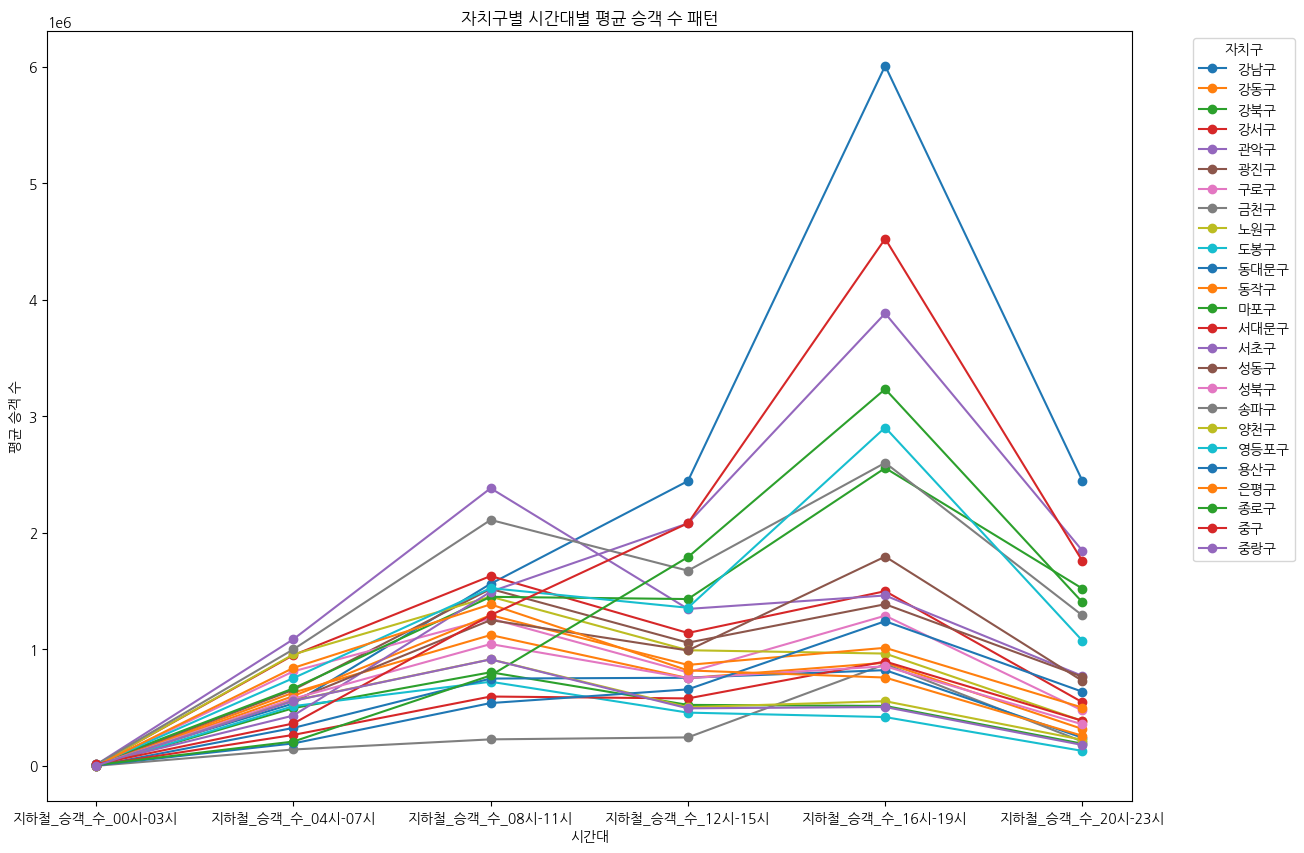

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 자치구별 시간대별 평균 승객 수 계산
mean_passengers_by_gu = subway_proc.groupby('자치구_명칭')[['지하철_승객_수_00시-03시', '지하철_승객_수_04시-07시', '지하철_승객_수_08시-11시', '지하철_승객_수_12시-15시', '지하철_승객_수_16시-19시', '지하철_승객_수_20시-23시']].mean()

# 자치구별 시간대별 승객 수 패턴 시각화
plt.figure(figsize=(14, 10))

for gu in mean_passengers_by_gu.index:
    plt.plot(mean_passengers_by_gu.columns, mean_passengers_by_gu.loc[gu], marker='o', label=gu)

plt.xlabel('시간대')
plt.ylabel('평균 승객 수')
plt.title('자치구별 시간대별 평균 승객 수 패턴')
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

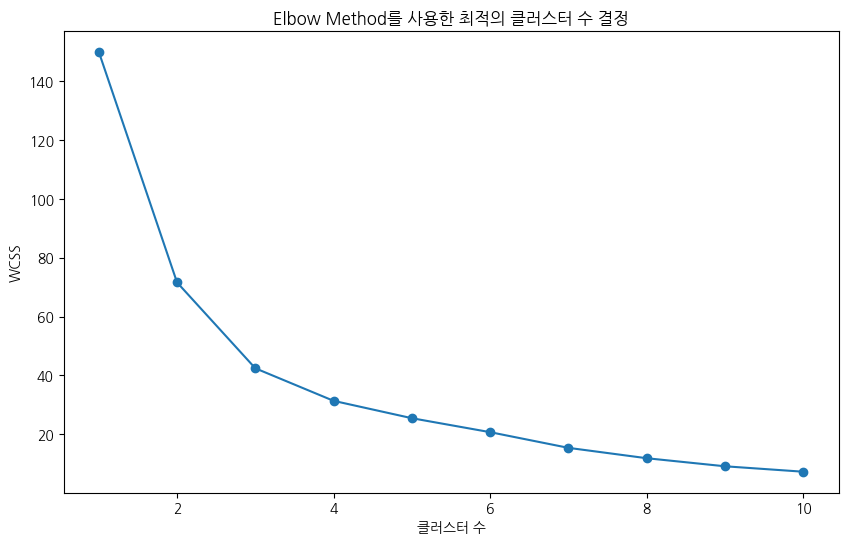

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


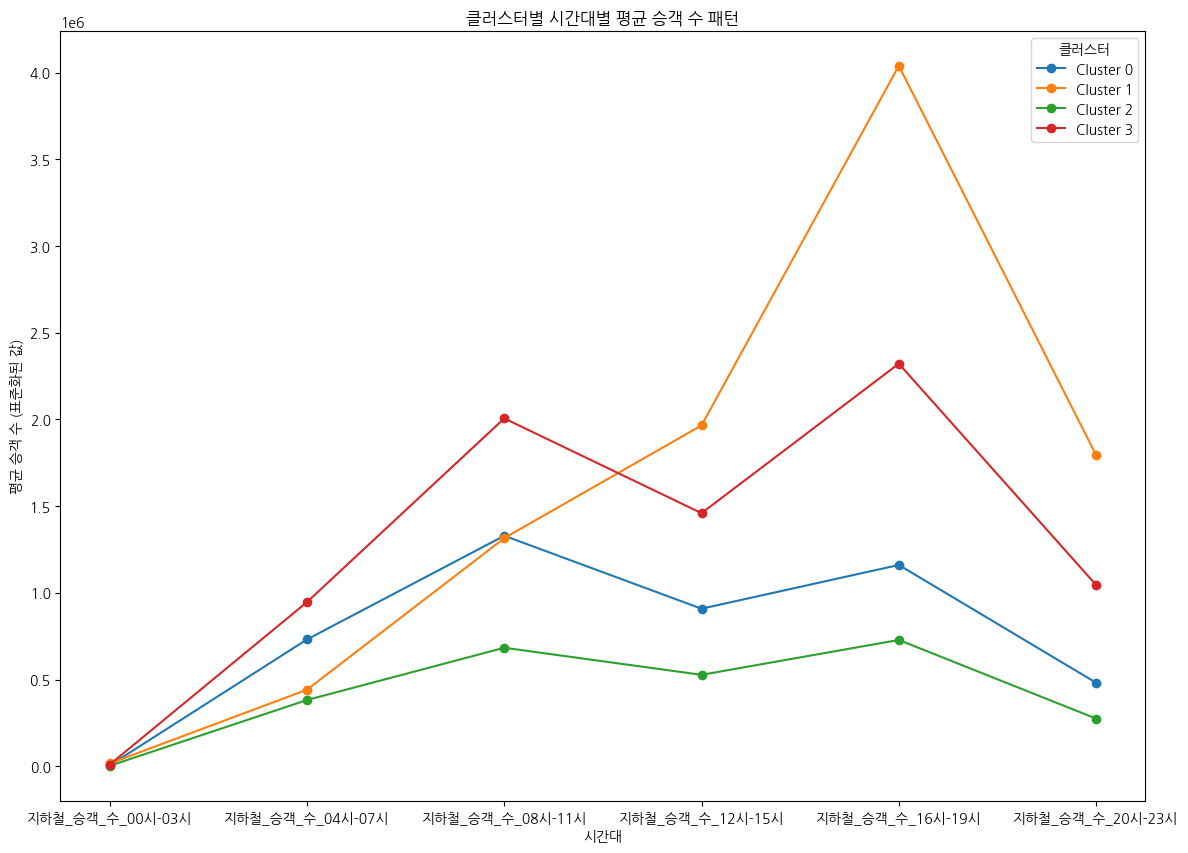

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 자치구별 시간대별 평균 승객 수 데이터 준비
data = subway_proc.groupby('자치구_명칭')[['지하철_승객_수_00시-03시', '지하철_승객_수_04시-07시', '지하철_승객_수_08시-11시', '지하철_승객_수_12시-15시', '지하철_승객_수_16시-19시', '지하철_승객_수_20시-23시']].mean()

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# 최적의 군집 수 결정 (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('클러스터 수')
plt.ylabel('WCSS')
plt.title('Elbow Method를 사용한 최적의 클러스터 수 결정')
plt.show()

# K-평균 클러스터링 (클러스터 수는 Elbow Method를 사용하여 결정)
optimal_clusters = 4  # 예시로 3을 선택 (Elbow Method 그래프를 통해 최적의 클러스터 수를 확인하세요)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 클러스터 레이블을 데이터프레임에 추가
data['Cluster'] = clusters

# 클러스터별 패턴 시각화
plt.figure(figsize=(14, 10))
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster].drop(columns='Cluster').mean()
    plt.plot(cluster_data.index, cluster_data.values, marker='o', label=f'Cluster {cluster}')

plt.xlabel('시간대')
plt.ylabel('평균 승객 수 (표준화된 값)')
plt.title('클러스터별 시간대별 평균 승객 수 패턴')
plt.legend(title='클러스터')
plt.show()


In [ ]:
# 각 클러스터에 속한 자치구 이름 출력
for cluster in range(optimal_clusters):
    cluster_gu_names = data[data['Cluster'] == cluster].index.tolist()
    print(f'클러스터 {cluster}: {cluster_gu_names}')

클러스터 0: ['강동구', '강서구', '광진구', '구로구', '노원구', '동작구', '성동구', '성북구', '은평구']
클러스터 1: ['강남구', '마포구', '서초구', '종로구', '중구']
클러스터 2: ['강북구', '금천구', '도봉구', '동대문구', '서대문구', '양천구', '용산구', '중랑구']
클러스터 3: ['관악구', '송파구', '영등포구']
